In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Malaria-Detection-master')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Malaria-Detection-master'

In [2]:
os.listdir()

['Malaria_Disease_Deep_Learning.ipynb',
 'Procfile',
 'app.py',
 'README.md',
 'requirements.txt',
 'CNN And Transfer LEarning.ipynb',
 'malariadetection.py',
 'LICENSE',
 'templates',
 'static',
 'Dataset',
 'LossVal_loss.png',
 'AccVal_acc.png',
 'model_vgg19.h5']

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras.layers import MaxPooling2D

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
#Takes the path to a directory & generates batches of augmented data.
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#There are 416 images in train  dataset so len(training_set) = 416/32 = 13 batches
#There are 134 images in test  dataset so len(test_set) = 134/32 = 5 batches

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [11]:
len(training_set),len(test_set)

(13, 5)

In [12]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 24s 876ms/step - loss: 1.6050 - accuracy: 0.5292 - val_loss: 1.1390 - val_accuracy: 0.3731
Epoch 2/50
13/13 [==============================] - 8s 628ms/step - loss: 0.7726 - accuracy: 0.6000 - val_loss: 0.5712 - val_accuracy: 0.7313
Epoch 3/50
13/13 [==============================] - 8s 637ms/step - loss: 0.4714 - accuracy: 0.7694 - val_loss: 0.6354 - val_accuracy: 0.6418
Epoch 4/50
13/13 [==============================] - 8s 631ms/step - loss: 0.3998 - accuracy: 0.8197 - val_loss: 0.4698 - val_accuracy: 0.7687
Epoch 5/50
13/13 [==============================] - 8s 629ms/step - loss: 0.3069 - accuracy: 0.8697 - val_loss: 0.4249 - val_accuracy: 0.8060
Epoch 6/50
13/13 [==============================] - 8s 623ms/step - loss: 0.3263 - accuracy: 0.8520 - val_loss: 0.3744 - val_accuracy: 0.8284
Epoch 7/50
13/13 [==============================] - 8s 620ms/step - loss: 0.2777 - accuracy: 0.8869 - val_loss: 0.4479 - val_accuracy: 0.7612
Epoch

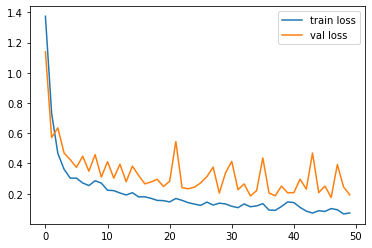

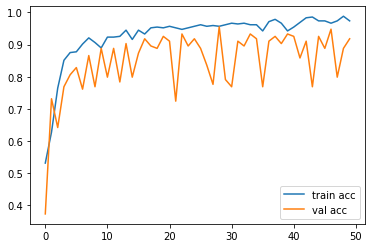

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [17]:

y_pred = model.predict(test_set)


y_pred

array([[8.53330791e-01, 1.46669164e-01],
       [1.39428496e-01, 8.60571444e-01],
       [9.76790130e-01, 2.32099369e-02],
       [3.12629163e-01, 6.87370777e-01],
       [9.92787182e-01, 7.21285027e-03],
       [9.76623967e-02, 9.02337611e-01],
       [7.27795139e-02, 9.27220464e-01],
       [2.65154064e-01, 7.34845936e-01],
       [9.99871850e-01, 1.28075320e-04],
       [9.99391198e-01, 6.08824310e-04],
       [9.74337697e-01, 2.56622694e-02],
       [1.38749495e-01, 8.61250579e-01],
       [9.87412691e-01, 1.25873191e-02],
       [9.70626533e-01, 2.93733981e-02],
       [5.70382595e-01, 4.29617375e-01],
       [6.26037598e-01, 3.73962432e-01],
       [8.82890105e-01, 1.17109902e-01],
       [9.97089565e-01, 2.91041750e-03],
       [1.72172278e-01, 8.27827692e-01],
       [3.11293066e-01, 6.88706934e-01],
       [9.55239952e-01, 4.47600111e-02],
       [2.96033800e-01, 7.03966141e-01],
       [9.99758303e-01, 2.41671107e-04],
       [9.99997258e-01, 2.71420436e-06],
       [9.999992

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis= 1)

y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_vgg19.h5')



img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [20]:
x.shape

(224, 224, 3)

In [21]:
x=x/255

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

model.predict(img_data)

a=np.argmax(model.predict(img_data), axis=1)

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
